## 1.导入numpy和FEM自编有限元库

In [1]:
import myFEM as fem
import numpy as np

<div aligned = "center"><img src="myFEM.png"></img></div>

## 2.设置材料参数、布置节点、并将节点按顺序以列表形式建立杆架系统

In [2]:
E = 200e9
A1 = 1e-4
l1 = 20e-2
A2 = A1 * np.sqrt(2)/2
l2 = np.sqrt(2) * l1

#以节点4为(0,0)原点,设置点集信息
node1 = fem.Node(l1 , l1)
node2 = fem.Node(l1 , 0)
node3 = fem.Node(0 , l1)
node4 = fem.Node(0 , 0)

#系统建立，将节点类以list列表输入
nodeList = [node1 , node2 , node3 , node4]
sys = fem.SysPole(nodeList)

successfully build system !


## 3.根据材料以及杆单元刚度参数，连接各个节点，展示连接矩阵

In [3]:
#节点连接，展示连接矩阵
sys.connect(3 , 1 , E , A1)
sys.connect(4 , 1 , E , A2)
sys.connect(1 , 2 , E , A1)
sys.connect(3 , 2 , E , A2)
sys.connect(4 , 2 , E , A1)
sys.connect(3 , 4 , E , A1)

#连接矩阵，含带方向，共六根杆
print('连接矩阵 ：\n' , sys.NodeConnection)

连接矩阵 ：
 [[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]
 [1. 1. 0. 0.]]


## 4.根据连接情况，组装刚度矩阵并且展示

In [4]:
#系统生成，组装刚度矩阵
sys.generate()

#展示系统刚度矩阵，考虑单位换算后，结果与书本上一致
print(sys.K/0.25/1e6)

successfully get matrix K !
[[ 500.  100.    0.    0. -400.    0. -100. -100.]
 [ 100.  500.    0. -400.    0.    0. -100. -100.]
 [   0.    0.  500. -100. -100.  100. -400.    0.]
 [   0. -400. -100.  500.  100. -100.    0.    0.]
 [-400.    0. -100.  100.  500. -100.    0.    0.]
 [   0.    0.  100. -100. -100.  500.    0. -400.]
 [-100. -100. -400.    0.    0.    0.  500.  100.]
 [-100. -100.    0.    0.    0. -400.  100.  500.]]


## 5.给定系统约束，对于不确定的地方不用设置，已在内部处理

In [5]:
#给定约束
sys.setP(1 , Px = 0 , Py = 10e3)
sys.setP(2 , Px = 0 , Py = 0)
sys.setUV(3 , u = 0 , v = 0)
sys.setUV(4 , u = 0 , v = 0)

## 6.系统求解整体求解，运用分块矩阵方式，并且打印信息

successfully update node infomation !
Report : Information of Each Node

****************************************

Connection Matrix : 
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]
 [1. 1. 0. 0.]]

Internel Force Matrix : 
[[    0.          4545.45454545     0.             0.        ]
 [    0.             0.             0.             0.        ]
 [-5454.54545455 -6428.24346533     0.             0.        ]
 [ 7713.8921584   4545.45454545     0.             0.        ]]


------------------------------
 Node1:
 Position : ( 0.2 , 0.2 )

Externel Load : 
Horizontal Load Px = 0.0
Vertical Load Py = 10000.0

Displacement : 
Horizontal Displacement u = -5.4545454545454546e-05
Vertical Displacement v = 0.0002727272727272728

------------------------------
 Node2:
 Position : ( 0.2 , 0 )

Externel Load : 
Horizontal Load Px = 0.0
Vertical Load Py = 0.0

Displacement : 
Horizontal Displacement u = 4.545454545454545e-05
Vertical Displacement v = 0.00022727272727272733

-----------------------

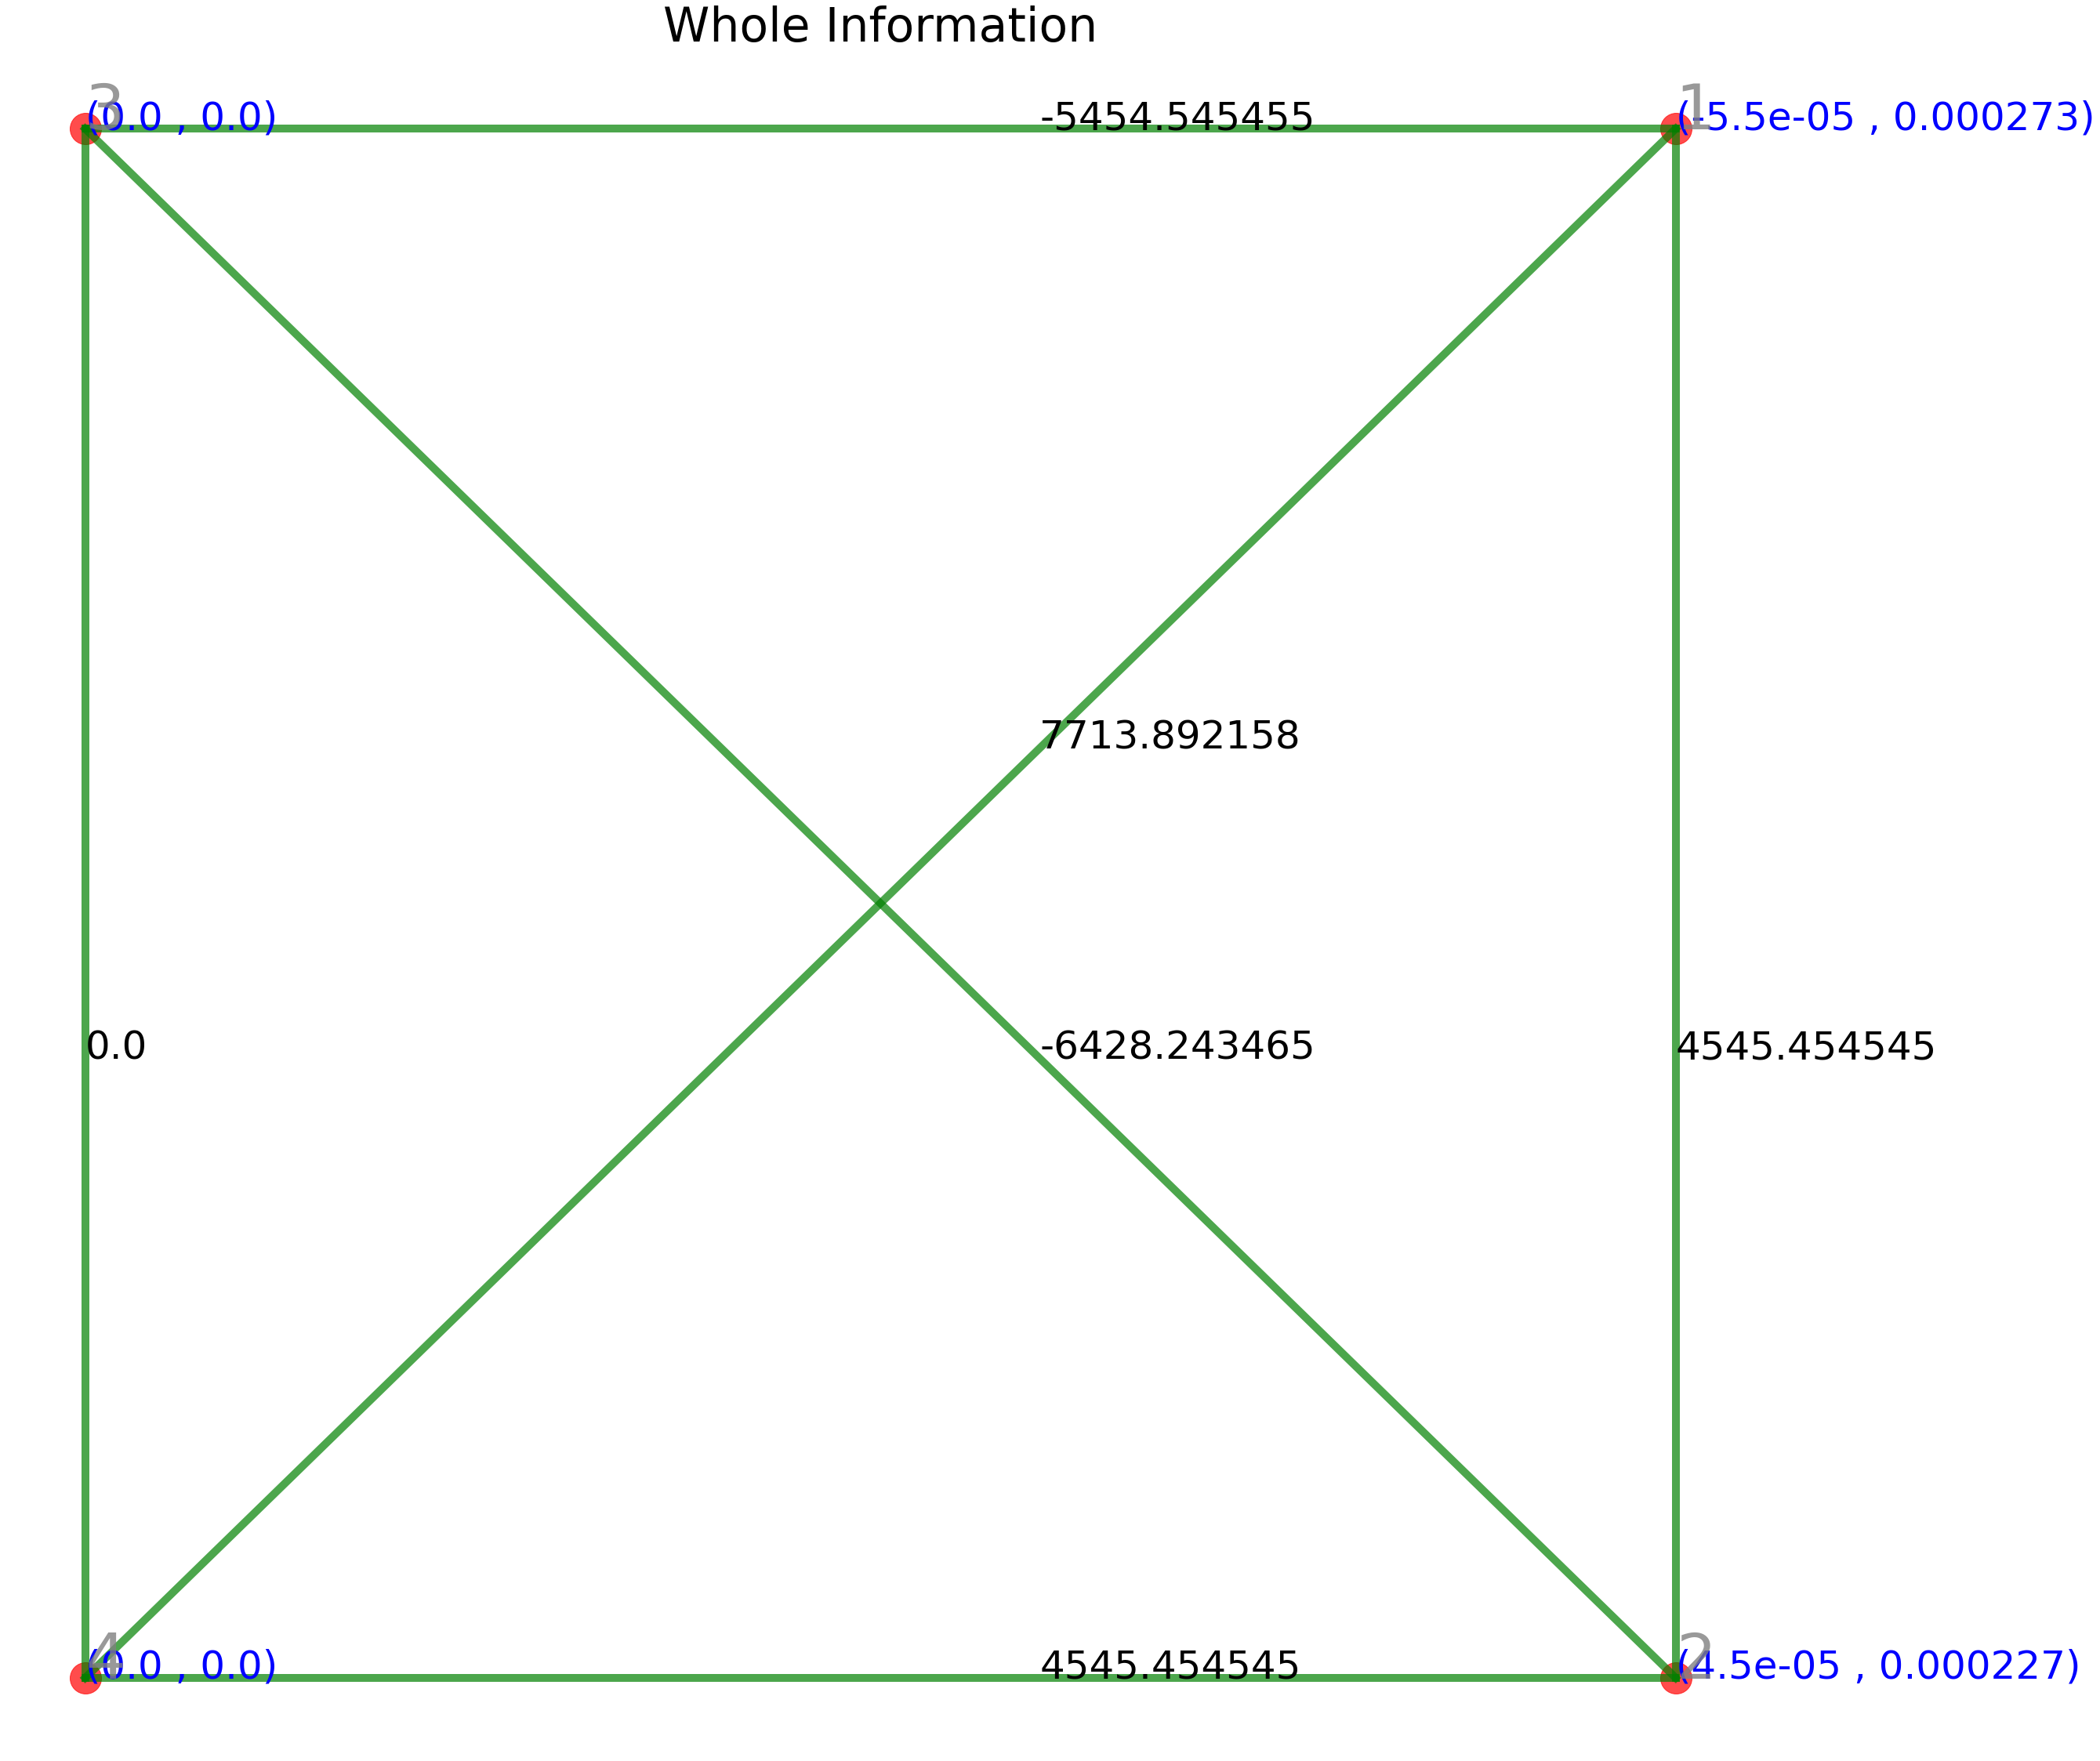

In [6]:
#求解
sys.solve()
#打印信息
sys.info()

## 7.导出计算报告入txt文本文件、并做图

In [7]:
sys.export('demo.txt' , 'demo.png' , 6)

successfully write to file demo.txt !
